In [1]:
# config
import common.init as init
from singleton_pattern.load_model import get_model
from  singleton_pattern.load_config import get_config,get_non_dnn_method_list
from singleton_pattern.load_dataset_reader import get_train_reader,get_test_reader
from singleton_pattern.load_data_generator import get_train_data_generator,get_test_data_generator
from common.cache import Cache

config_name = 'PhysNet.yaml'
# init
init.run(config_name)

CUDA:
---------------------------
PyTorch supports GPU and currently has 1 CUDA devices available.
The current default CUDA device is: NVIDIA GeForce RTX 3090
---------------------------
Method and DataGenerator Name: PhysNet


In [2]:
config = get_config()
non_dnn_method_list = get_non_dnn_method_list()
model = get_model()
is_need_train = config['method'] not in non_dnn_method_list
train_dataloader = None
# load train dataset
if is_need_train:
    train_reader = get_train_reader()
    print(f'train_reader: {train_reader.loader_name}')
    train_data = train_reader.load_data()
    train_data_generator = get_train_data_generator()
    train_dataloader = train_data_generator.get_tensor_dataloader(train_data)
# load test dataset
test_reader = get_test_reader()
test_data_generator = get_test_data_generator()
print(f'Test Loader: {test_reader.loader_name}')
test_data = test_reader.load_data()
test_dataloader = test_data_generator.get_tensor_dataloader(test_data)

train_reader: UBFC_Phys
Root Path:D:\BaiduNetdiskDownload\UBFC-PHYs_1-14
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/14 [00:00<?, ?it/s]

cache path:cache\TRAIN\b9bf1c4fb3d8aee205c7bfa71c35370995b6d19a5ce9318bcf8326bf42c2d290
dataset size: 1234
Test Loader: UBFC_Phys
Root Path:D:\BaiduNetdiskDownload\UBFC-PHYs_14-16
Start Reading UBFC_Phys Dataset Directory...


Progress:   0%|          | 0/2 [00:00<?, ?it/s]

cache path:cache\TEST\ec31e169d7a376db59326fac6d83801cdb92a6c44ed3cc0dc45dc7dff4cc78ba
dataset size: 180


optimizer:Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
criterion:PhyNetLoss(
  (neg_pearson_Loss): NegPearsonLoss()
)


Progress:   0%|          | 0/200 [00:00<?, ?it/s]

cache path:cache\MODEL\
Epoch [1/200],Train Loss: 1.0076,Test Loss: 0.9908,Epoch 0
Epoch [2/200],Train Loss: 0.9935,Test Loss: 0.9967,Epoch 1
Epoch [3/200],Train Loss: 0.9075,Test Loss: 0.9975,Epoch 1
training is forcibly terminated: best loss 0.9935, best test loss 0.9967
train total time:  0h:3m:3s


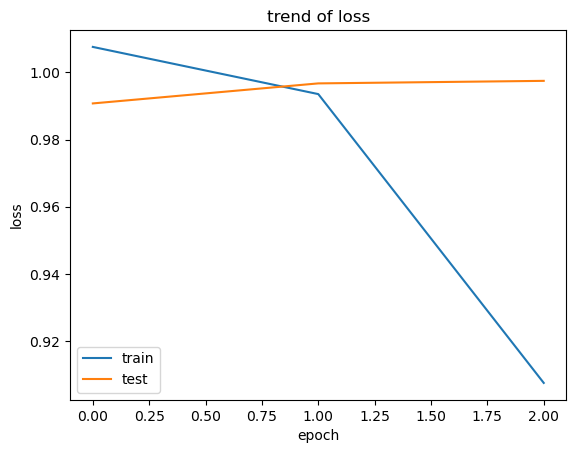

In [3]:
# if cached and want to second training, set train_twice = True
from common.cache import CacheType


train_twice = False
# train
if is_need_train:
    from common.train_model import run as run_train
    if train_dataloader is None:
        raise Exception('load train dataloader first')
    if train_twice:
        cache_model = Cache(CacheType.MODEL).read_model()
        model.load_state_dict(cache_model.state_dict())
    run_train(model,train_dataloader,test_dataloader)

In [ ]:
# load test model
use_cache_model = True

import matplotlib.pyplot as plt
import numpy as np
if use_cache_model and is_need_train:
    cache_model = Cache('model').read_model()
    model.load_state_dict(cache_model.state_dict())
model.eval()
model.to('cpu')
pass

cache\6d7e853460b1fd9208d4b080524537e8830b79f1d3681abe2ac1ce2dc82b8607\model


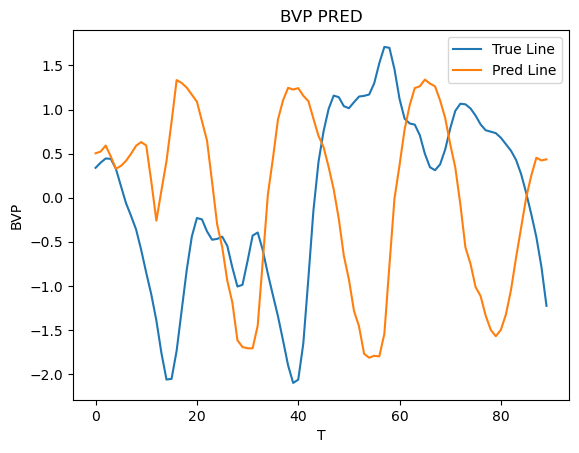

In [ ]:
# output image
i = 0
for batch_X, batch_y in test_dataloader:
    index_n = 7
    if i == index_n:
        plt.title("BVP PRED")
        plt.xlabel("T")
        plt.ylabel("BVP")
        pred = model(batch_X)
        true_data = np.array(batch_y.view(-1).numpy())
        pred_data = np.array(pred.detach().view(-1).numpy())
        true_data = true_data = (true_data - true_data.mean())/true_data.std()
        pred_data = pred_data = (pred_data - pred_data.mean())/pred_data.std()
        plt.plot(true_data, label="True Line")
        plt.plot(pred_data, label="Pred Line")
        plt.legend()
        plt.show()
    if i > index_n:
        break
    i+=1


In [ ]:
try:
    while True:
        pass
except KeyboardInterrupt:
    print("hhh")

hhh
